1. Importação de Bibliotecas e Dados

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

#eliminar warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [57]:
import pandas as pd

# Carregando os dados
equipamentos_df = pd.read_excel('23w06_Equipamentos.xlsx')
series_temporais_df = pd.read_excel('23w06_SeriesTemporais_Horimetros.xlsx')

In [58]:
merged_df = pd.merge(series_temporais_df, equipamentos_df, left_on='Chassis Id*', right_on='Chassis ID', how='left')

2. Análise Exploratória dos Dados

In [59]:
equipamentos_df.info()
series_temporais_df.info()

equipamentos_df.describe(include='all')
series_temporais_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Região         63 non-null     object        
 1   País           63 non-null     object        
 2   Dealer         63 non-null     object        
 3   Segmento       63 non-null     object        
 4   Modelo         63 non-null     object        
 5   Chassis ID     63 non-null     object        
 6   PIN17          57 non-null     object        
 7   Delivery Date  62 non-null     datetime64[ns]
 8   Obs.:          15 non-null     object        
 9   Estado         63 non-null     object        
 10  Região.1       63 non-null     object        
dtypes: datetime64[ns](1), object(10)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118161 entries, 0 to 118160
Data columns (total 3 columns):
 #   Column                            Non-Null Count   Dtype   

,Compensated Working Hours By Day
count,118161.000000
mean,5.803329
std,6.365152
min,0.000000
25%,0.038235
50%,4.200000
75%,9.200000
max,85.450000


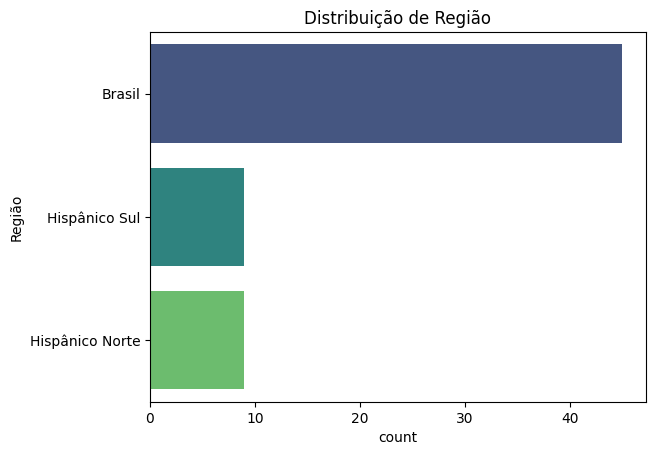

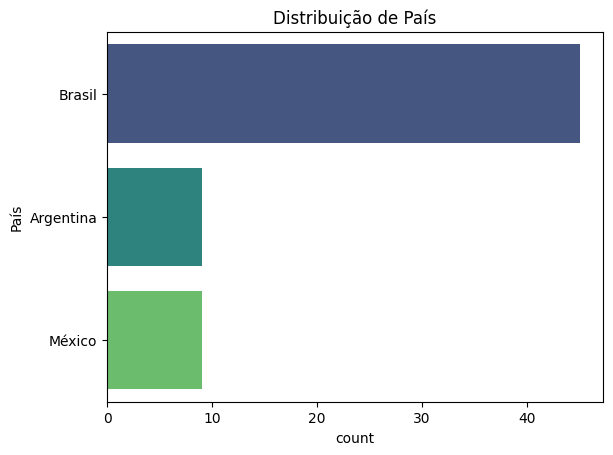

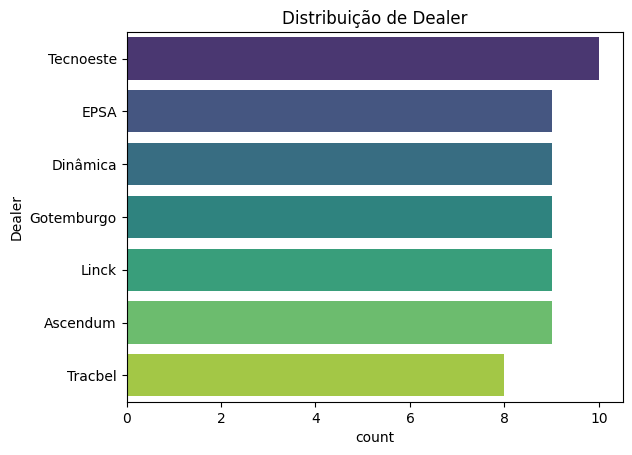

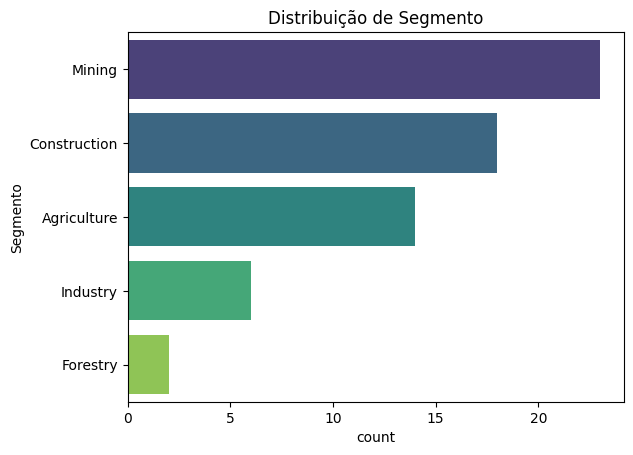

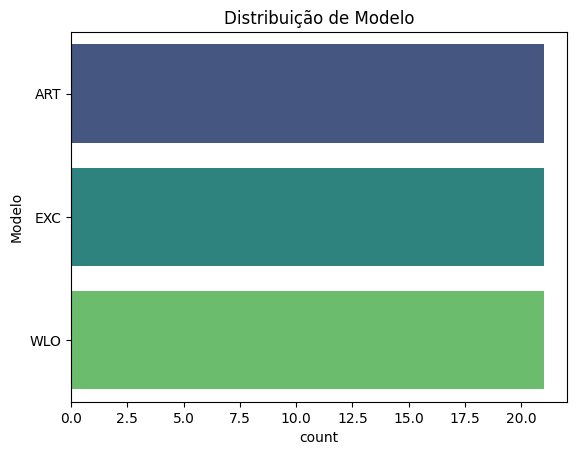

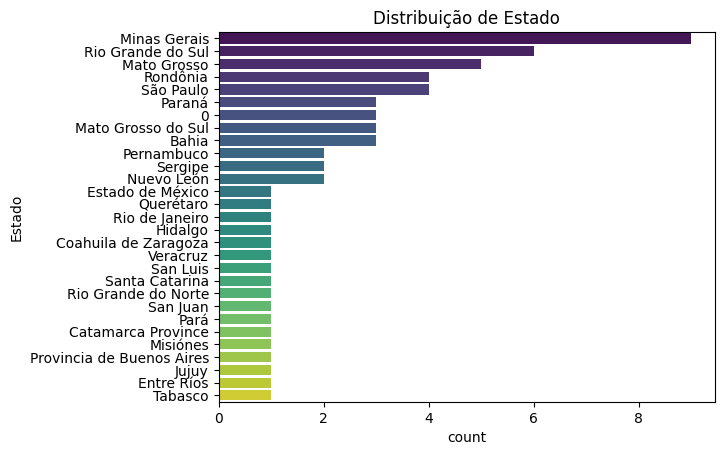

In [60]:
categorical_vars_equip = ["Região", "País", "Dealer", "Segmento", "Modelo", "Estado"]

for var in categorical_vars_equip:
    sns.countplot(data=equipamentos_df, y=var, order=equipamentos_df[var].value_counts().index, palette="viridis")
    plt.title(f'Distribuição de {var}')
    plt.show()

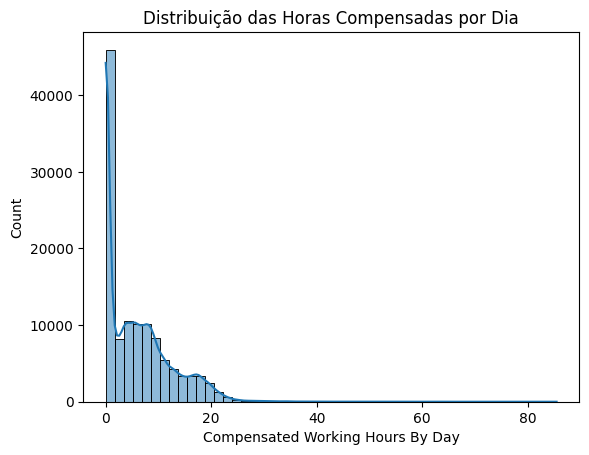

In [61]:
sns.histplot(data=series_temporais_df, x='Compensated Working Hours By Day', bins=50, kde=True)
plt.title('Distribuição das Horas Compensadas por Dia')
plt.show()

Passo 4: Análise de Valores Ausentes
É importante verificar se há valores ausentes nos dados, pois eles podem afetar a análise e a modelagem.

In [62]:
print(equipamentos_df.isnull().sum())
print(series_temporais_df.isnull().sum())

Região            0
País              0
Dealer            0
Segmento          0
Modelo            0
Chassis ID        0
PIN17             6
Delivery Date     1
Obs.:            48
Estado            0
Região.1          0
dtype: int64
Chassis Id*                         0
Machine History Date Day            0
Compensated Working Hours By Day    0
dtype: int64


Passo 5: Análise de Valores Anômalos
Valores anômalos ou outliers podem distorcer ou influenciar negativamente os resultados. Vamos focar no dataframe series_temporais_df e verificar se há alguma anomalia nas horas compensadas por dia.

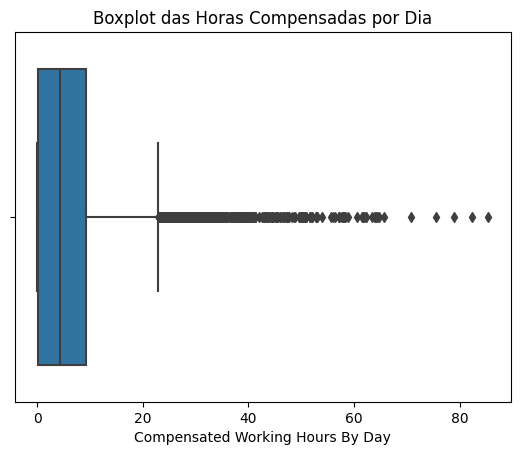

In [63]:
sns.boxplot(data=series_temporais_df, x='Compensated Working Hours By Day')
plt.title('Boxplot das Horas Compensadas por Dia')
plt.show()

Passo 7: Análise Temporal
Como você possui dados de séries temporais, é útil visualizar as tendências ao longo do tempo.

Vamos plotar um gráfico de linha para visualizar a tendência das horas compensadas por dia ao longo do tempo.

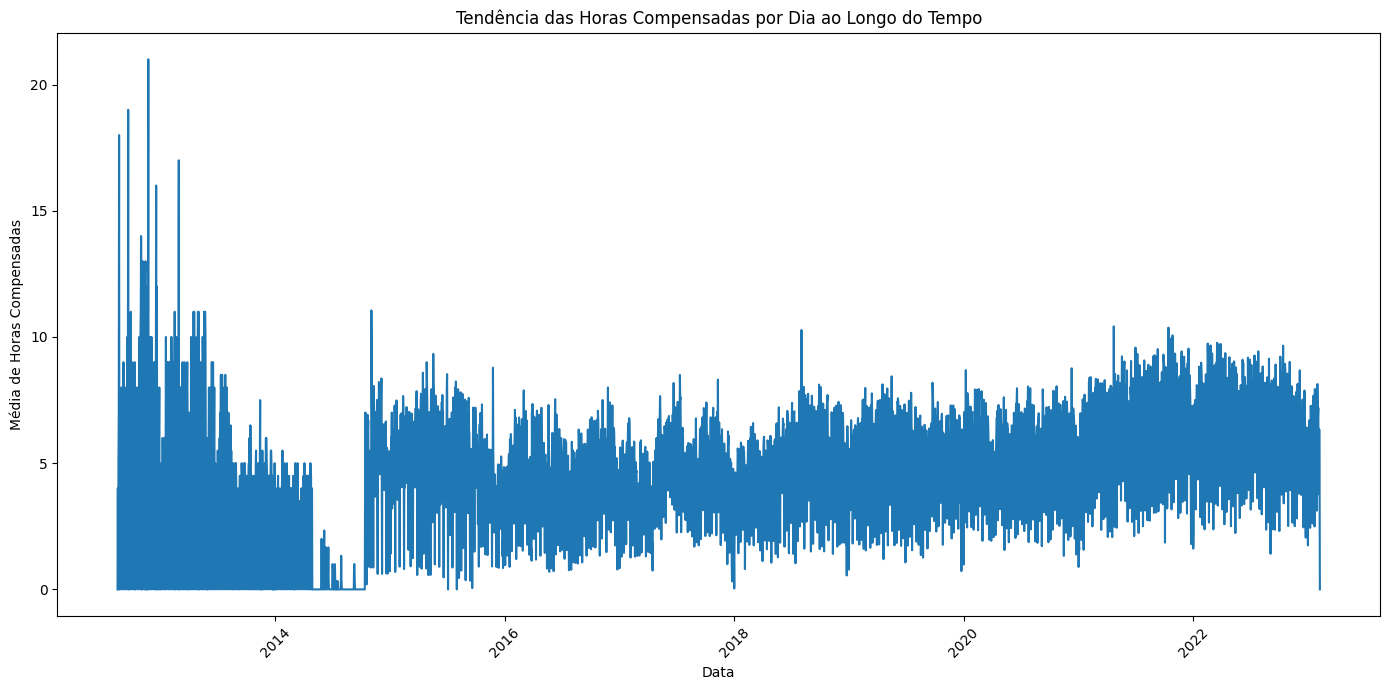

In [64]:
# Agrupando os dados por data e calculando a média das horas compensadas
time_series_data = series_temporais_df.groupby('Machine History Date Day')['Compensated Working Hours By Day'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data, x='Machine History Date Day', y='Compensated Working Hours By Day')
plt.title('Tendência das Horas Compensadas por Dia ao Longo do Tempo')
plt.ylabel('Média de Horas Compensadas')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

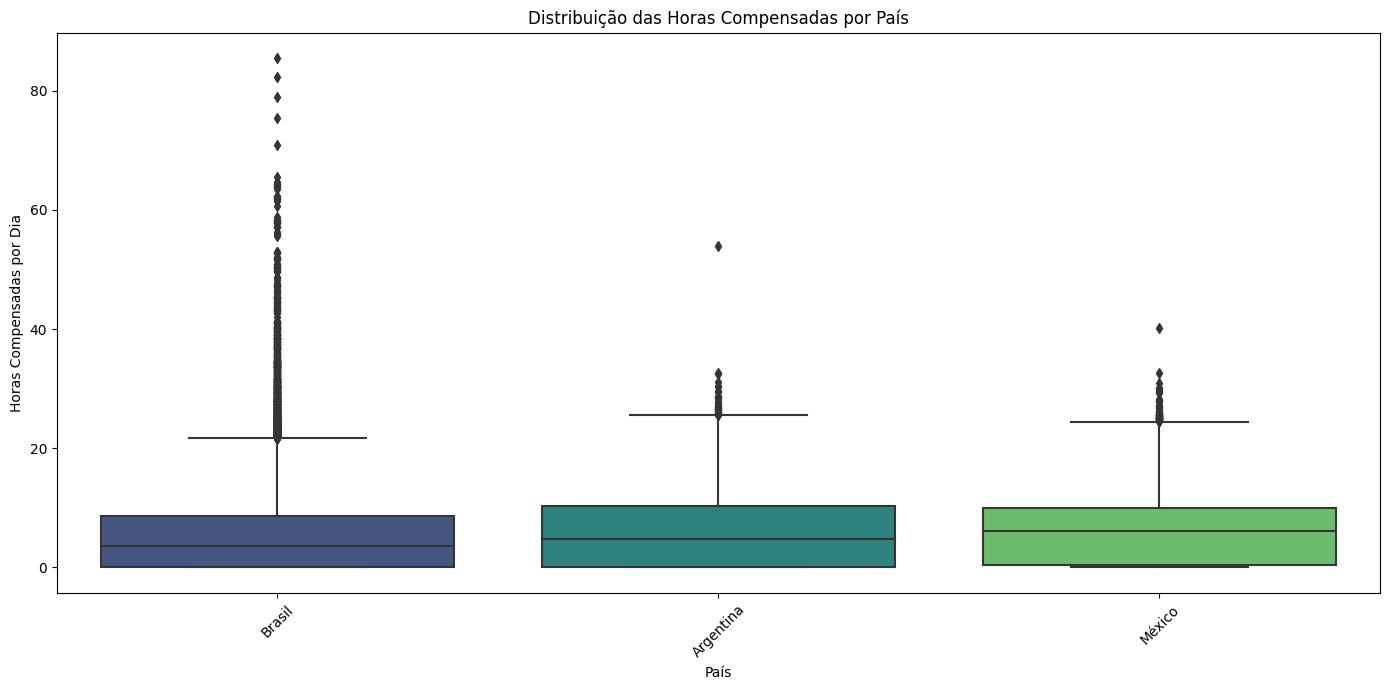

In [65]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=merged_df, x='País', y='Compensated Working Hours By Day', palette="viridis")
plt.title('Distribuição das Horas Compensadas por País')
plt.ylabel('Horas Compensadas por Dia')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Passo 9: Análise de Agrupamento
Para entender o comportamento das horas compensadas em diferentes categorias, podemos agrupar os dados e calcular estatísticas descritivas.

Por exemplo, podemos calcular a média das horas compensadas por dia para cada país e segmento:

In [66]:
grouped_by_country = merged_df.groupby('País')['Compensated Working Hours By Day'].mean()
grouped_by_segment = merged_df.groupby('Segmento')['Compensated Working Hours By Day'].mean()

Passo 10: Visualizações Avançadas
Podemos também criar visualizações mais avançadas para entender a relação entre as variáveis.

Distribuição das Horas Compensadas por País e Segmento:

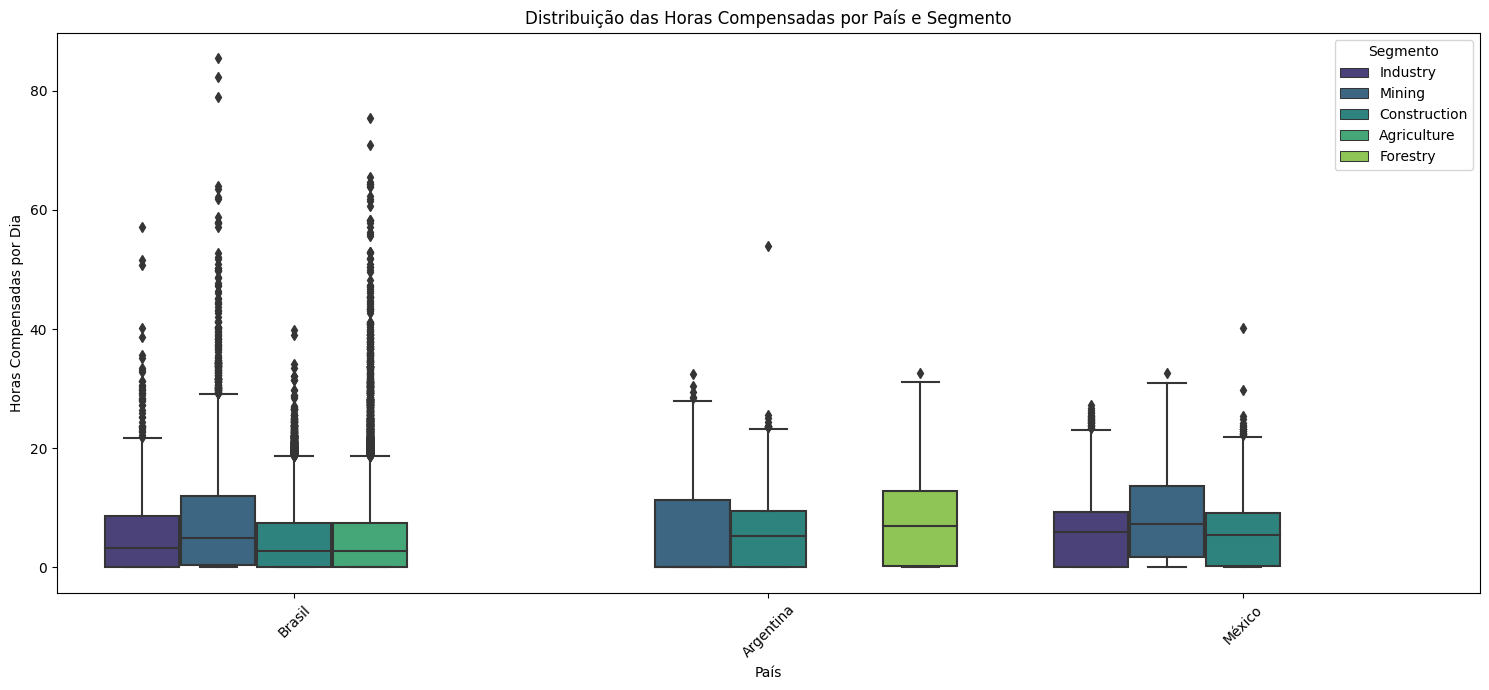

In [67]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=merged_df, x='País', y='Compensated Working Hours By Day', hue='Segmento', palette='viridis')
plt.title('Distribuição das Horas Compensadas por País e Segmento')
plt.ylabel('Horas Compensadas por Dia')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

Distribuição das Horas Compensadas por Modelo:

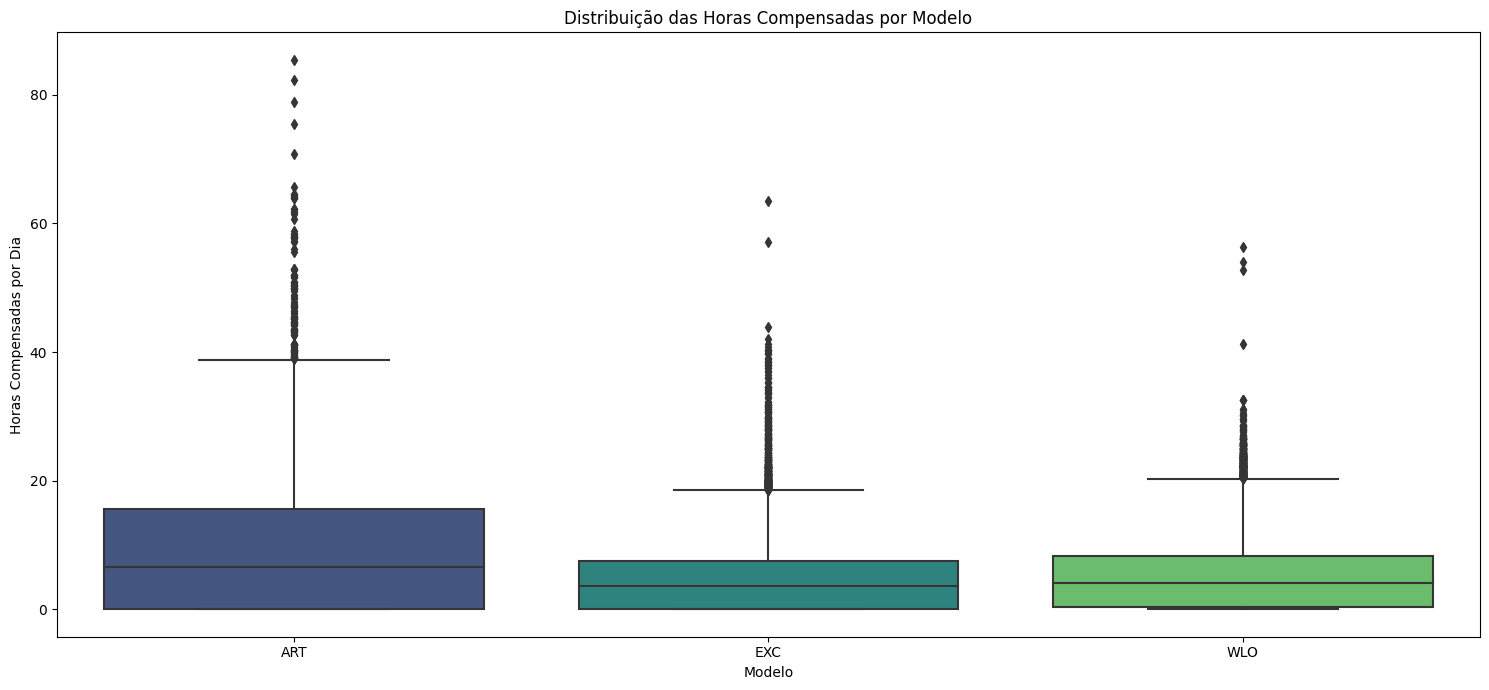

In [68]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=merged_df, x='Modelo', y='Compensated Working Hours By Day', palette='viridis')
plt.title('Distribuição das Horas Compensadas por Modelo')
plt.ylabel('Horas Compensadas por Dia')
plt.xlabel('Modelo')
plt.tight_layout()
plt.show()

Passo 12: Análise Temporal Detalhada
Tendências Gerais:
Primeiro, vamos observar as tendências gerais das horas compensadas ao longo do tempo.

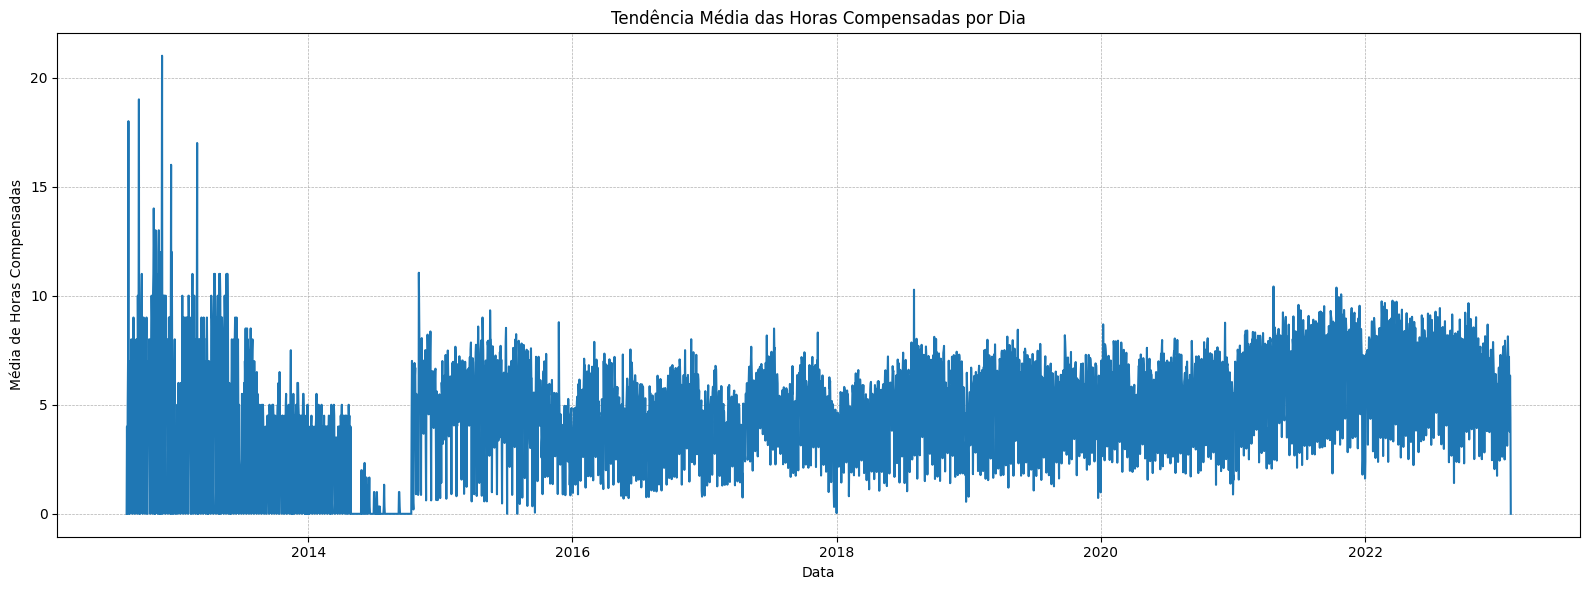

In [69]:
# Agrupando por data e calculando a média diária
time_series_avg = merged_df.groupby('Machine History Date Day')['Compensated Working Hours By Day'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=time_series_avg, x='Machine History Date Day', y='Compensated Working Hours By Day')
plt.title('Tendência Média das Horas Compensadas por Dia')
plt.ylabel('Média de Horas Compensadas')
plt.xlabel('Data')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Tendências por Categoria:
Podemos também observar como diferentes categorias (como País ou Segmento) se comportam ao longo do tempo.
Por exemplo, para ver a tendência das horas compensadas por país:

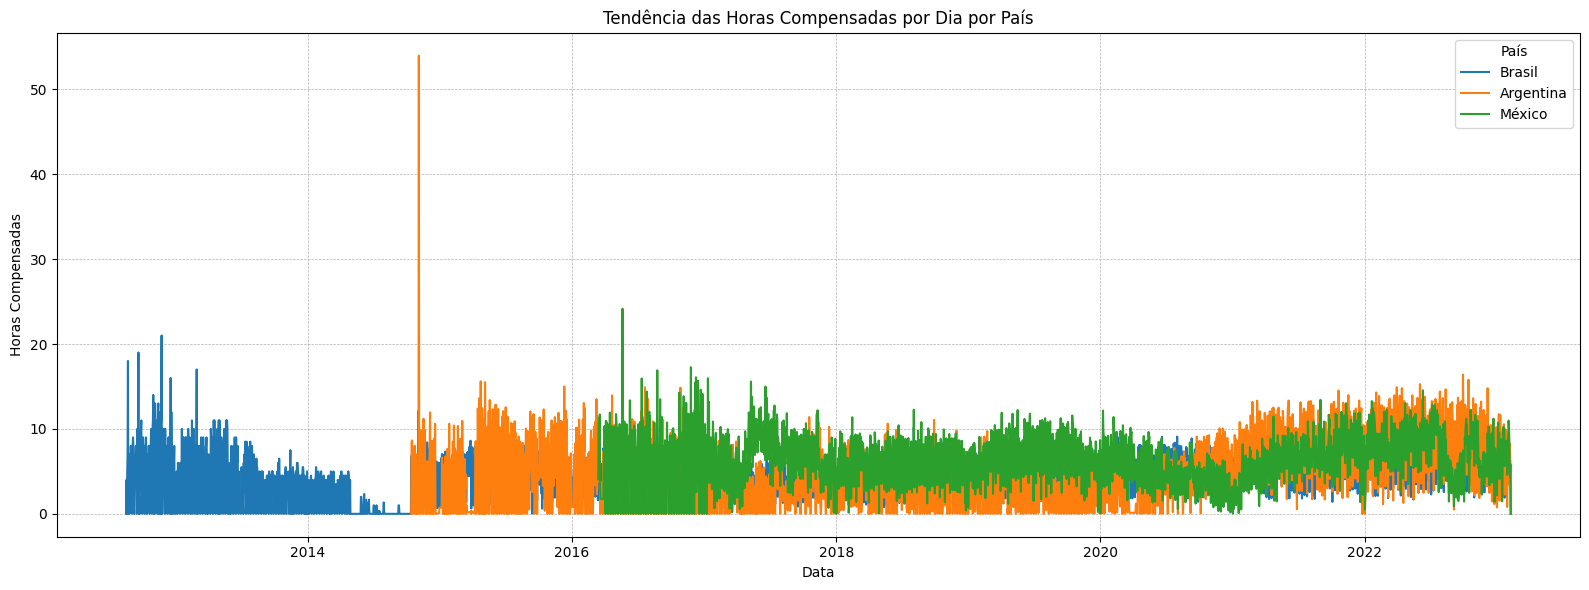

In [70]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='País', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por País')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='País')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

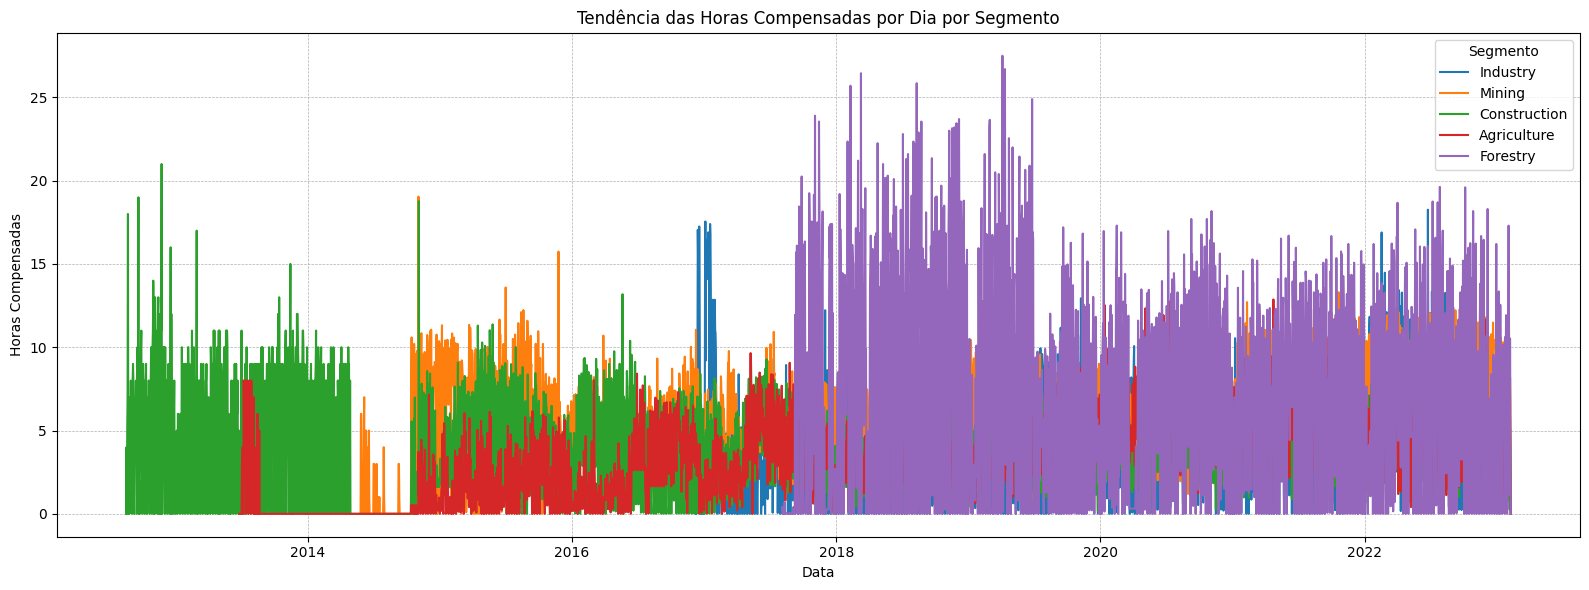

In [71]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Segmento', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Segmento')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Segmento')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

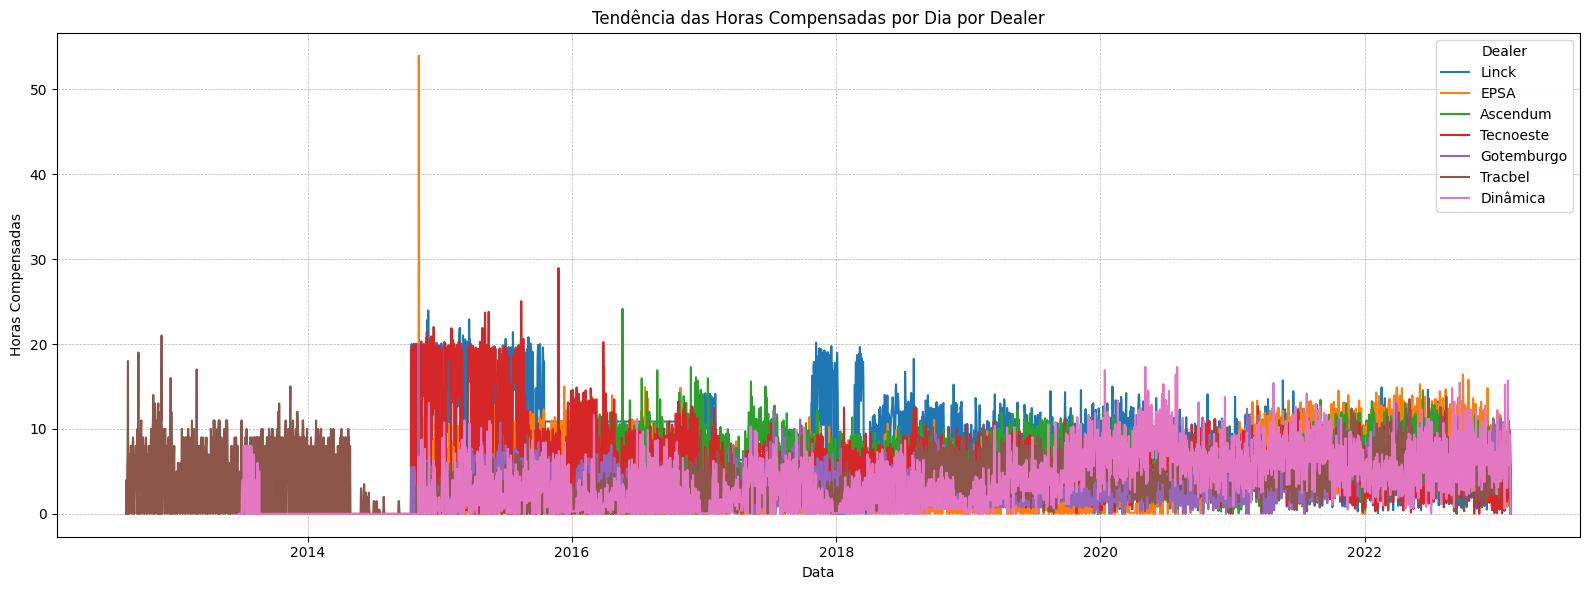

In [72]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Dealer', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Dealer')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Dealer')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

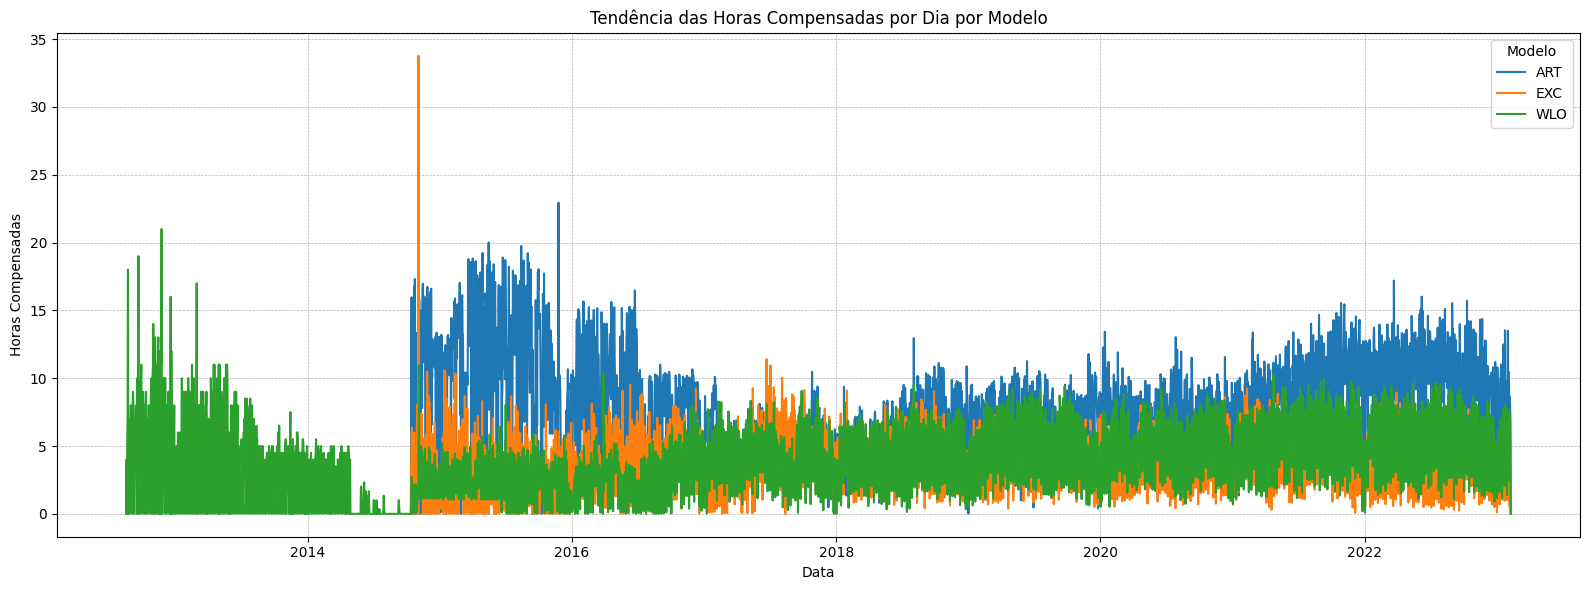

In [73]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Modelo', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Modelo')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Modelo')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

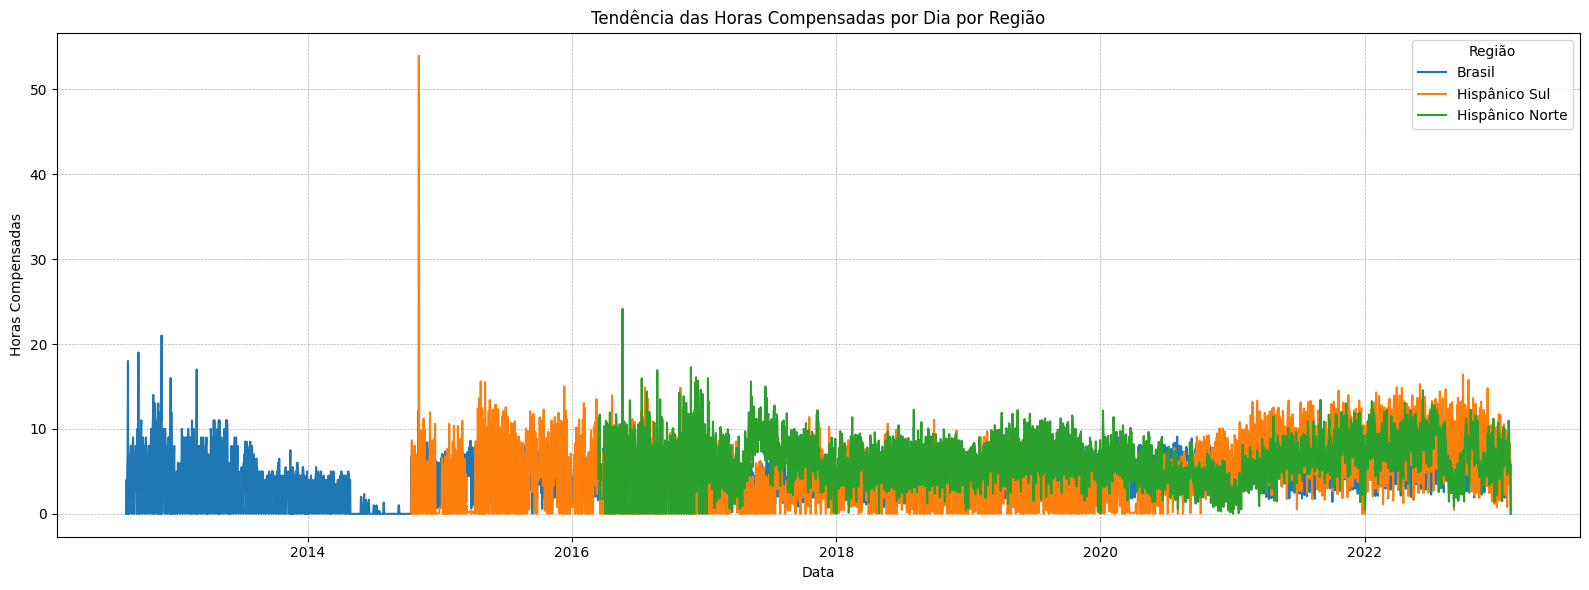

In [74]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Região', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Região')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Região')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Análise de Sazonalidade:
Para entender se existe algum padrão sazonal nas horas compensadas, podemos decompor a série temporal.

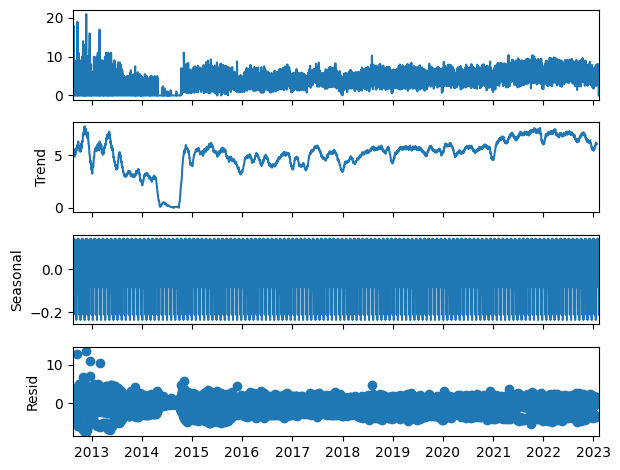

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal
decomposition = seasonal_decompose(time_series_avg.set_index('Machine History Date Day'), period=30)  # period pode ser ajustado conforme a sazonalidade esperada

# Plotando a decomposição
decomposition.plot()
plt.show()

Passo 14: Modelagem dos Dados
Dado que nosso objetivo é prever o "horímetro" de um equipamento (quantidade de horas de operação que um equipamento tem), estamos lidando com um problema de regressão.

Vamos começar com um modelo de regressão básico e, em seguida, explorar modelos mais complexos.

Preparação dos Dados:
Primeiro, certifique-se de que os dados estão preparados. Se você já fez a preparação anteriormente, pode pular essa etapa. Caso contrário, siga os passos de preparação mencionados anteriormente.

Construção do Modelo de Regressão:
Vamos começar com um modelo de regressão linear simples para estabelecer uma linha de base.

In [76]:
# Extração de características temporais
merged_df['Year'] = merged_df['Machine History Date Day'].dt.year
merged_df['Month'] = merged_df['Machine History Date Day'].dt.month
merged_df['Day'] = merged_df['Machine History Date Day'].dt.day
merged_df['Weekday'] = merged_df['Machine History Date Day'].dt.weekday
merged_df['Week_of_Year'] = merged_df['Machine History Date Day'].dt.isocalendar().week

# Agora, podemos excluir a coluna original 'Machine History Date Day'
merged_df = merged_df.drop(columns=['Machine History Date Day'])

In [77]:
# 1. Excluir Colunas Não Relevantes
cols_to_drop = ['Chassis Id*', 'Chassis ID', 'PIN17', 'Obs.:', 'Delivery Date']
merged_df_cleaned = merged_df.drop(columns=cols_to_drop)

# 2. Codificar Variáveis Categóricas
merged_df_encoded = pd.get_dummies(merged_df_cleaned, drop_first=True)

# 3. Tratar Valores Ausentes
for column in merged_df_encoded.columns:
    merged_df_encoded[column].fillna(merged_df_encoded[column].mean(), inplace=True)

# 4. Dividir os Dados
X = merged_df_encoded.drop(columns=['Compensated Working Hours By Day'])
y = merged_df_encoded['Compensated Working Hours By Day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
merged_df_cleaned.head()

,Compensated Working Hours By Day,Região,País,Dealer,Segmento,Modelo,Estado,Região.1,Year,Month,Day,Weekday,Week_of_Year
0,0.00,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,9,4,49
1,5.75,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,10,5,49
2,8.95,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,11,6,49
3,1.60,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,12,0,50
4,8.20,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,13,1,50


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializando o modelo
linear_regressor = LinearRegression()

# Treinando o modelo
linear_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = linear_regressor.predict(X_test)

# Calculando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

Erro_absoluto_sem_feature_engineering = mae

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 4.221298689519023
Mean Squared Error (MSE): 30.14241501627152
Root Mean Squared Error (RMSE): 5.490210835320582
R-squared (R2): 0.26029053625476906


### Eles sabem que até 4 dias o modelo pode ser bom, entender engenharia de features para > 4 dias

In [80]:
for i in range(5, 15):
    series_temporais_df[f'Lag_{i}'] = series_temporais_df.groupby('Chassis Id*')['Compensated Working Hours By Day'].shift(i)

lag_features = [f'Lag_{i}' for i in range(5, 10)]
series_temporais_df[lag_features] = series_temporais_df[lag_features].fillna(0)

In [81]:
'''# Defina a janela de tempo de 4 dias
janela_tempo = timedelta(days=4)

# Obtenha a data mais recente nos dados
data_mais_recente = series_temporais_df['Machine History Date Day'].max()

# Calcule a data limite (4 dias atrás da data mais recente)
data_limite = data_mais_recente - janela_tempo

# Filtre o DataFrame original para obter apenas as máquinas que enviaram dados nos últimos 4 dias
dados_ultimos_4_dias = series_temporais_df[series_temporais_df['Machine History Date Day'] >= data_limite]'''

"# Defina a janela de tempo de 4 dias\njanela_tempo = timedelta(days=4)\n\n# Obtenha a data mais recente nos dados\ndata_mais_recente = series_temporais_df['Machine History Date Day'].max()\n\n# Calcule a data limite (4 dias atrás da data mais recente)\ndata_limite = data_mais_recente - janela_tempo\n\n# Filtre o DataFrame original para obter apenas as máquinas que enviaram dados nos últimos 4 dias\ndados_ultimos_4_dias = series_temporais_df[series_temporais_df['Machine History Date Day'] >= data_limite]"

In [82]:
merged_df = series_temporais_df.merge(equipamentos_df, left_on='Chassis Id*', right_on='Chassis ID', how='left')

1. Diferença Temporal
Vamos calcular a diferença entre a data atual e a Delivery Date para obter a "idade" da máquina em dias.

In [83]:
merged_df['Machine_Age'] = (pd.Timestamp.now() - merged_df['Delivery Date']).dt.days

2. Dados Históricos
Podemos calcular estatísticas como média, mediana, e soma das horas trabalhadas nos últimos N dias. Por simplicidade, vamos calcular a média das horas trabalhadas nos últimos 7 dias.

In [84]:
#merged_df['Average_Hours_Last_8_Days'] = merged_df.groupby('Chassis ID')['Compensated Working Hours By Day'].transform(lambda x: x.rolling(8, 1).mean())
#merged_df['Average_Hours_Last_7_Days'] = merged_df.groupby('Chassis ID')['Compensated Working Hours By Day'].transform(lambda x: x.rolling(7, 1).mean())
#merged_df['Average_Hours_Last_6_Days'] = merged_df.groupby('Chassis ID')['Compensated Working Hours By Day'].transform(lambda x: x.rolling(6, 1).mean())
#merged_df['Average_Hours_Last_5_Days'] = merged_df.groupby('Chassis ID')['Compensated Working Hours By Day'].transform(lambda x: x.rolling(5, 1).mean())

In [85]:
'''def calculate_moving_averages(df, column_name, window_sizes):
    for window_size in window_sizes:
        new_column_name = f'{column_name}_Last_{window_size}_Days'
        df[new_column_name] = df.groupby('Chassis ID')[column_name].transform(lambda x: x.rolling(window_size, min_periods=1).mean())

# Exemplo de uso:
window_sizes = [14, 13, 12, 11, 10, 9, 8, 7, 6, 5]
calculate_moving_averages(merged_df, 'Compensated Working Hours By Day', window_sizes)'''


"def calculate_moving_averages(df, column_name, window_sizes):\n    for window_size in window_sizes:\n        new_column_name = f'{column_name}_Last_{window_size}_Days'\n        df[new_column_name] = df.groupby('Chassis ID')[column_name].transform(lambda x: x.rolling(window_size, min_periods=1).mean())\n\n# Exemplo de uso:\nwindow_sizes = [14, 13, 12, 11, 10, 9, 8, 7, 6, 5]\ncalculate_moving_averages(merged_df, 'Compensated Working Hours By Day', window_sizes)"

In [86]:
def calculate_specific_moving_averages(df, column_name):

    # Define the custom intervals
    intervals = [(5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12) , (5, 13), (5, 14)]

    for start_day, end_day in intervals:
        new_column_name = f'{column_name}_Days_{start_day}_to_{end_day}'

        df[new_column_name] = df.groupby('Chassis ID').apply(lambda group: group[column_name].rolling(window=end_day - start_day + 1, min_periods=1).mean().shift(-end_day + start_day)).reset_index(level=0, drop=True)

    return df

# Example of usage:
merged_df = calculate_specific_moving_averages(merged_df, 'Compensated Working Hours By Day')

3. Agrupar e Agregar
Vamos criar características que representem a média de horas trabalhadas agrupadas por "País" e "Dealer".

In [87]:
merged_df['Average_Hours_By_Country'] = merged_df.groupby('País')['Compensated Working Hours By Day'].transform('mean')
merged_df['Average_Hours_By_Dealer'] = merged_df.groupby('Dealer')['Compensated Working Hours By Day'].transform('mean')

4. Interação entre Características
Vamos criar uma nova característica que combina "Segmento" e "Modelo".

In [88]:
merged_df['Segment_Model'] = merged_df['Segmento'] + "_" + merged_df['Modelo']

In [89]:
merged_df.head()

,Chassis Id*,Machine History Date Day,Compensated Working Hours By Day,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,...,Compensated Working Hours By Day_Days_5_to_8,Compensated Working Hours By Day_Days_5_to_9,Compensated Working Hours By Day_Days_5_to_10,Compensated Working Hours By Day_Days_5_to_11,Compensated Working Hours By Day_Days_5_to_12,Compensated Working Hours By Day_Days_5_to_13,Compensated Working Hours By Day_Days_5_to_14,Average_Hours_By_Country,Average_Hours_By_Dealer,Segment_Model
0,A030F720057,2016-12-09,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,4.0750,4.90,6.925000,8.064286,8.06250,8.533333,9.405,5.486688,7.769779,Industry_ART
1,A030F720057,2016-12-10,5.75,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,6.1250,8.31,9.408333,9.214286,9.60000,10.450000,10.765,5.486688,7.769779,Industry_ART
2,A030F720057,2016-12-11,8.95,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,8.9500,10.14,9.791667,10.150000,11.03750,11.322222,10.885,5.486688,7.769779,Industry_ART
3,A030F720057,2016-12-12,1.60,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,10.4375,9.96,10.350000,11.335714,11.61875,11.100000,9.990,5.486688,7.769779,Industry_ART
4,A030F720057,2016-12-13,8.20,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,12.0500,12.10,12.958333,13.050000,12.28750,10.922222,9.830,5.486688,7.769779,Industry_ART


In [90]:
# 1. Excluir Colunas Não Relevantes
cols_to_drop = ['Chassis Id*', 'Chassis ID', 'PIN17', 'Obs.:', 'Delivery Date', 'Machine History Date Day']
merged_df_cleaned = merged_df.drop(columns=cols_to_drop)

# 2. Codificar Variáveis Categóricas
merged_df_encoded = pd.get_dummies(merged_df_cleaned, drop_first=True)

# 3. Tratar Valores Ausentes
for column in merged_df_encoded.columns:
    merged_df_encoded[column].fillna(merged_df_encoded[column].mean(), inplace=True)

# 4. Dividir os Dados
X = merged_df_encoded.drop(columns=['Compensated Working Hours By Day'])
y = merged_df_encoded['Compensated Working Hours By Day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Inicializando o modelo
linear_regressor = LinearRegression()

# Treinando o modelo
linear_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = linear_regressor.predict(X_test)

# Calculando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.7052251593650014
Mean Squared Error (MSE): 8.465036699588167
Root Mean Squared Error (RMSE): 2.9094736121140823
R-squared (R2): 0.7922638994169551


In [92]:
from sklearn.metrics import mean_squared_error

for column in X_train.columns:
    # Treinar um modelo de regressão linear usando apenas uma característica
    lr_single = LinearRegression()
    lr_single.fit(X_train[[column]], y_train)

    # Fazer previsões no conjunto de teste
    y_pred_single = lr_single.predict(X_test[[column]])

    # Calcular o RMSE
    rmse_single = np.sqrt(mean_squared_error(y_test, y_pred_single))
    print(f"RMSE usando apenas {column}: {rmse_single:.2f}")

RMSE usando apenas Lag_5: 5.62
RMSE usando apenas Lag_6: 5.42
RMSE usando apenas Lag_7: 5.06
RMSE usando apenas Lag_8: 5.48
RMSE usando apenas Lag_9: 5.66
RMSE usando apenas Lag_10: 5.74
RMSE usando apenas Lag_11: 5.75
RMSE usando apenas Lag_12: 5.75
RMSE usando apenas Lag_13: 5.56
RMSE usando apenas Lag_14: 5.26
RMSE usando apenas Machine_Age: 6.30
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_6: 3.04
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_7: 3.66
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_8: 3.97
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_9: 4.13
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_10: 4.22
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_11: 4.23
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_12: 4.16
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_13: 4.20
RMSE usando apenas Compensated Working Hours By Day_Days_5_to_14: 4.29
RMSE usando a

In [93]:
for column in X_train.columns:
    # Excluir uma característica
    X_train_drop = X_train.drop(columns=[column])
    X_test_drop = X_test.drop(columns=[column])

    # Treinar um modelo de regressão linear sem a característica
    lr_drop = LinearRegression()
    lr_drop.fit(X_train_drop, y_train)

    # Fazer previsões no conjunto de teste
    y_pred_drop = lr_drop.predict(X_test_drop)

    # Calcular o RMSE
    rmse_drop = np.sqrt(mean_squared_error(y_test, y_pred_drop))
    print(f"RMSE sem {column}: {rmse_drop:.2f}")


RMSE sem Lag_5: 2.91
RMSE sem Lag_6: 2.92
RMSE sem Lag_7: 2.93
RMSE sem Lag_8: 2.91
RMSE sem Lag_9: 2.91
RMSE sem Lag_10: 2.91
RMSE sem Lag_11: 2.91
RMSE sem Lag_12: 2.91
RMSE sem Lag_13: 2.92
RMSE sem Lag_14: 2.92
RMSE sem Machine_Age: 2.91
RMSE sem Compensated Working Hours By Day_Days_5_to_6: 3.40
RMSE sem Compensated Working Hours By Day_Days_5_to_7: 2.91
RMSE sem Compensated Working Hours By Day_Days_5_to_8: 2.91
RMSE sem Compensated Working Hours By Day_Days_5_to_9: 2.91
RMSE sem Compensated Working Hours By Day_Days_5_to_10: 2.91
RMSE sem Compensated Working Hours By Day_Days_5_to_11: 2.91
RMSE sem Compensated Working Hours By Day_Days_5_to_12: 2.93
RMSE sem Compensated Working Hours By Day_Days_5_to_13: 2.91
RMSE sem Compensated Working Hours By Day_Days_5_to_14: 2.91
RMSE sem Average_Hours_By_Country: 2.91
RMSE sem Average_Hours_By_Dealer: 2.91
RMSE sem Região_Hispânico Norte: 2.91
RMSE sem Região_Hispânico Sul: 2.91
RMSE sem País_Brasil: 2.91
RMSE sem País_México: 2.91
RMSE s

In [94]:
# Calculando a média móvel dos últimos 7 dias a partir do dia 5
new_column_name = 'Moving_Average_7_days_from_day_5'
series_temporais_df[new_column_name] = series_temporais_df.groupby('Chassis Id*')['Compensated Working Hours By Day'].rolling(window=7).mean().reset_index(0, drop=True)

# Deslocando os resultados para que a média dos dias 5-11 apareça na linha do dia 5
series_temporais_df[new_column_name] = series_temporais_df[new_column_name].shift(-6)


In [95]:
'''# Calculando a média móvel dos últimos 7 dias
series_temporais_df['Moving_Average_7_days'] = series_temporais_df.groupby('Chassis Id*')['Compensated Working Hours By Day'].rolling(window=7).mean().reset_index(0, drop=True)'''

"# Calculando a média móvel dos últimos 7 dias\nseries_temporais_df['Moving_Average_7_days'] = series_temporais_df.groupby('Chassis Id*')['Compensated Working Hours By Day'].rolling(window=7).mean().reset_index(0, drop=True)"

In [96]:
# Removendo linhas onde a média móvel é NaN
series_temporais_df_cleaned = series_temporais_df.dropna(subset=['Moving_Average_7_days_from_day_5'])

In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true_ma = series_temporais_df_cleaned['Compensated Working Hours By Day']
y_pred_ma = series_temporais_df_cleaned['Moving_Average_7_days_from_day_5']

mse_mean_model_ma = mean_squared_error(y_true_ma, y_pred_ma)
rmse_mean_model_ma = np.sqrt(mse_mean_model_ma)
print(f"RMSE for 7-day moving average model: {rmse_mean_model_ma}")

mae = mean_absolute_error(y_true_ma, y_pred_ma)
print(f"Mean Absolute Error (MAE): {mae}")

Erro_absoluto_media_movel = mae

RMSE for 7-day moving average model: 4.16547976266451
Mean Absolute Error (MAE): 2.712001369024802


In [98]:
# Inicializando o modelo
linear_regressor = LinearRegression()

# Treinando o modelo
linear_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = linear_regressor.predict(X_test)

# Calculando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

Erro_absoluto_LR_modelo1 = mae

print(f"RMSE for Linear model: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

RMSE for Linear model: 2.9094736121140823
Mean Absolute Error (MAE): 1.7052251593650014


In [99]:
# 1. Importando bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, GRU

from keras.callbacks import EarlyStopping

# Define o Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [100]:
# 2. Preparando dados
# Normalizar os dados pode ser uma boa prática ao trabalhar com redes neurais
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
# 3. Construir o modelo
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=70, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model_LSTM.add(LSTM(units=70))
model_LSTM.add(Dense(units=1))

model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# 4. Treinar o modelo
model_LSTM.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_split=0.10, callbacks=[early_stopping])

Epoch 1/100
665/665 [==============================] - 10s 10ms/step - loss: 41.0265 - val_loss: 38.9935
Epoch 2/100
665/665 [==============================] - 6s 9ms/step - loss: 18.8292 - val_loss: 14.4785
Epoch 3/100
665/665 [==============================] - 6s 9ms/step - loss: 14.0703 - val_loss: 13.7487
Epoch 4/100
665/665 [==============================] - 6s 9ms/step - loss: 13.3275 - val_loss: 11.7883
Epoch 5/100
665/665 [==============================] - 6s 9ms/step - loss: 12.2908 - val_loss: 11.5494
Epoch 6/100
665/665 [==============================] - 6s 9ms/step - loss: 12.2553 - val_loss: 11.1388
Epoch 7/100
665/665 [==============================] - 6s 9ms/step - loss: 11.8623 - val_loss: 11.3258
Epoch 8/100
665/665 [==============================] - 6s 9ms/step - loss: 11.5186 - val_loss: 12.1793
Epoch 9/100
665/665 [==============================] - 6s 9ms/step - loss: 11.2363 - val_loss: 10.4998
Epoch 10/100
665/665 [==============================] - 6s 9ms/step - l

In [102]:
# 5. Fazer previsões
predicted_values = model_LSTM.predict(X_test_scaled)

739/739 [==============================] - 3s 4ms/step


In [103]:
Erro_absoluto_model_LSTM = mean_absolute_error(predicted_values, y_test)
print('LSTM:', Erro_absoluto_model_LSTM)

LSTM: 2.115424744908537


In [104]:
# 3. Construir o modelo
model_BDLSTM = Sequential()
model_BDLSTM.add(Bidirectional(LSTM(units=70, return_sequences=True), input_shape=(X_train_scaled.shape[1], 1)))
model_BDLSTM.add(Bidirectional(LSTM(units=70)))
model_BDLSTM.add(Dense(units=1))

model_BDLSTM.compile(optimizer='adam', loss='mean_squared_error')

# 4. Treinar o modelo
history = model_BDLSTM.fit(X_train_scaled, y_train, epochs=100, batch_size=256, validation_split=0.10, callbacks=[early_stopping])

Epoch 1/100
333/333 [==============================] - 14s 25ms/step - loss: 22.9749 - val_loss: 15.6550
Epoch 2/100
333/333 [==============================] - 7s 21ms/step - loss: 15.7013 - val_loss: 15.2102
Epoch 3/100
333/333 [==============================] - 7s 21ms/step - loss: 15.1216 - val_loss: 14.6253
Epoch 4/100
333/333 [==============================] - 7s 21ms/step - loss: 13.3556 - val_loss: 11.3035
Epoch 5/100
333/333 [==============================] - 7s 21ms/step - loss: 10.9457 - val_loss: 11.0257
Epoch 6/100
333/333 [==============================] - 7s 21ms/step - loss: 10.3744 - val_loss: 10.3224
Epoch 7/100
333/333 [==============================] - 7s 21ms/step - loss: 9.9911 - val_loss: 9.8202
Epoch 8/100
333/333 [==============================] - 7s 21ms/step - loss: 9.8350 - val_loss: 9.9467
Epoch 9/100
333/333 [==============================] - 7s 21ms/step - loss: 9.4474 - val_loss: 10.6245
Epoch 10/100
333/333 [==============================] - 7s 21ms/step

In [105]:
# 5. Fazer previsões
predicted_values_BDLSTM = model_BDLSTM.predict(X_test_scaled)

739/739 [==============================] - 6s 6ms/step


In [106]:
Erro_absoluto_model_BDLSTM = mean_absolute_error(predicted_values_BDLSTM, y_test)
print('BDLSTM:', Erro_absoluto_model_BDLSTM)

BDLSTM: 1.7799491807751906


In [107]:
# 3. Construir o modelo GRU
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model_GRU.add(GRU(units=50, return_sequences=True))
model_GRU.add(Dense(units=1))

model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# 4. Treinar o modelo
history = model_GRU.fit(X_train_scaled, y_train, epochs=100, batch_size=256, validation_split=0.10, callbacks=[early_stopping])

Epoch 1/100
333/333 [==============================] - 8s 12ms/step - loss: 35.7990 - val_loss: 21.6782
Epoch 2/100
333/333 [==============================] - 3s 10ms/step - loss: 20.1916 - val_loss: 18.4534
Epoch 3/100
333/333 [==============================] - 3s 10ms/step - loss: 18.0005 - val_loss: 16.5473
Epoch 4/100
333/333 [==============================] - 3s 10ms/step - loss: 15.4464 - val_loss: 13.6611
Epoch 5/100
333/333 [==============================] - 3s 10ms/step - loss: 13.4120 - val_loss: 12.7110
Epoch 6/100
333/333 [==============================] - 3s 10ms/step - loss: 12.6372 - val_loss: 12.3879
Epoch 7/100
333/333 [==============================] - 3s 10ms/step - loss: 12.1280 - val_loss: 12.7100
Epoch 8/100
333/333 [==============================] - 3s 10ms/step - loss: 11.6875 - val_loss: 13.0120
Epoch 9/100
333/333 [==============================] - 3s 10ms/step - loss: 11.4317 - val_loss: 11.2930
Epoch 10/100
333/333 [==============================] - 3s 10ms/

In [108]:
# 5. Fazer previsões
predicted_values_GRU_last = model_GRU.predict(X_test_scaled)
# Supondo que predicted_values_GRU tenha a forma (n_samples, sequence_length, n_features)
# Pegue apenas o último output da sequência para cada amostra
predicted_values_GRU = predicted_values_GRU_last[:, -1, :]

739/739 [==============================] - 3s 4ms/step


In [109]:
# 3. Construir o modelo GRU
model_BGRU = Sequential()
model_BGRU.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=(X_train_scaled.shape[1], 1)))
model_BGRU.add(Bidirectional(GRU(units=50, return_sequences=True)))
model_BGRU.add(Dense(units=1))

model_BGRU.compile(optimizer='adam', loss='mean_squared_error')

# 4. Treinar o modelo
history = model_BGRU.fit(X_train_scaled, y_train, epochs=100, batch_size=256, validation_split=0.10, callbacks=[early_stopping])

Epoch 1/100
333/333 [==============================] - 13s 23ms/step - loss: 29.6597 - val_loss: 18.1655
Epoch 2/100
333/333 [==============================] - 6s 19ms/step - loss: 17.2889 - val_loss: 15.5852
Epoch 3/100
333/333 [==============================] - 6s 19ms/step - loss: 15.5506 - val_loss: 15.6718
Epoch 4/100
333/333 [==============================] - 6s 19ms/step - loss: 15.0686 - val_loss: 15.1723
Epoch 5/100
333/333 [==============================] - 6s 19ms/step - loss: 14.3982 - val_loss: 14.0556
Epoch 6/100
333/333 [==============================] - 6s 19ms/step - loss: 12.9177 - val_loss: 11.9922
Epoch 7/100
333/333 [==============================] - 6s 19ms/step - loss: 11.5921 - val_loss: 11.0246
Epoch 8/100
333/333 [==============================] - 6s 19ms/step - loss: 10.8106 - val_loss: 11.1433
Epoch 9/100
333/333 [==============================] - 6s 19ms/step - loss: 10.1483 - val_loss: 10.1485
Epoch 10/100
333/333 [==============================] - 6s 19ms

In [110]:
# 5. Fazer previsões
predicted_values_BGRU_last = model_BGRU.predict(X_test_scaled)
# Supondo que predicted_values_GRU tenha a forma (n_samples, sequence_length, n_features)
# Pegue apenas o último output da sequência para cada amostra
predicted_values_BGRU = predicted_values_BGRU_last[:, -1, :]

739/739 [==============================] - 6s 6ms/step


In [111]:
Erro_absoluto_model_GRU = mean_absolute_error(predicted_values_GRU, y_test)
print('GRU:', Erro_absoluto_model_GRU)

Erro_absoluto_model_BGRU = mean_absolute_error(predicted_values_BGRU, y_test)
print('BGRU:', Erro_absoluto_model_BGRU)

GRU: 1.7679592520405902
BGRU: 1.58294867304841


In [112]:
resultados_1 = pd.DataFrame([Erro_absoluto_sem_feature_engineering,
                             Erro_absoluto_media_movel,
                             Erro_absoluto_LR_modelo1,
                           Erro_absoluto_model_LSTM,
                           Erro_absoluto_model_BDLSTM,
                              Erro_absoluto_model_GRU,
                              Erro_absoluto_model_BGRU])


resultados_1["modelos"] = ["Reg. Linear S/ FE",
                         "Média Móvel",
                         "Reg. Linear",
                         "LSTM",
                         "BDLSTM",
                           'GRU',
                           'BGRU']

resultados_1 = resultados_1.rename({0: "erro_medio"}, axis = 1)

resultados_1["metodo"] = 1

resultados_1 = resultados_1.rename({0: "erro_medio"}, axis = 1)

resultados_1

,erro_medio,modelos,metodo
0,4.221299,Reg. Linear S/ FE,1
1,2.712001,Média Móvel,1
2,1.705225,Reg. Linear,1
3,2.115425,LSTM,1
4,1.779949,BDLSTM,1
5,1.767959,GRU,1
6,1.582949,BGRU,1


In [117]:
resultados = resultados_1


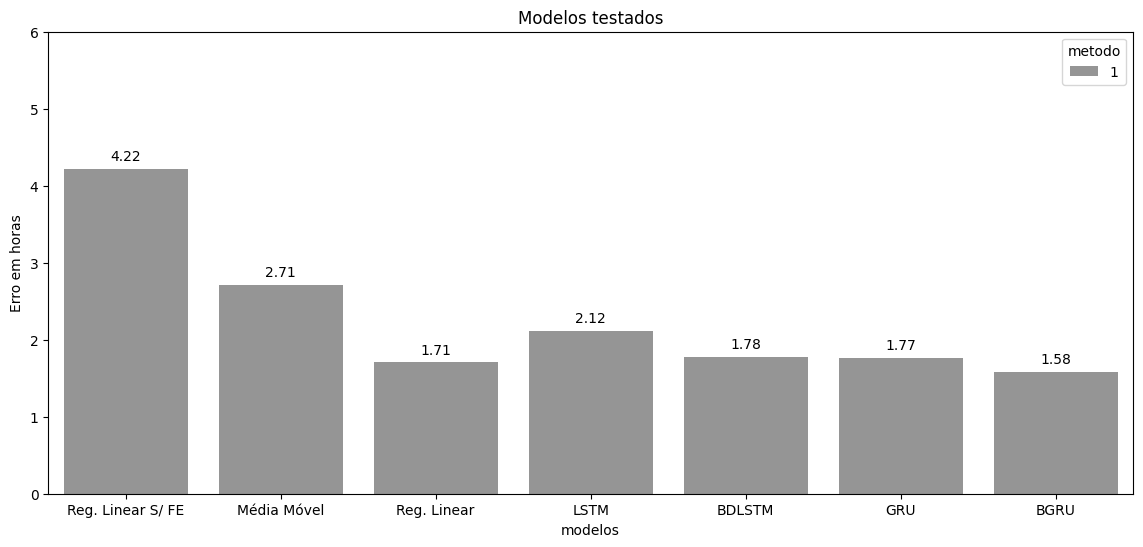

In [118]:
plt.figure(figsize = (14,6))

splot = sns.barplot(data= resultados,
            x = "modelos",
            y = "erro_medio",
            hue = "metodo",
            palette = "Greys");
splot.set_ylim(0,6)
splot.set_ylabel("Erro em horas")

plt.title("Modelos testados")


for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

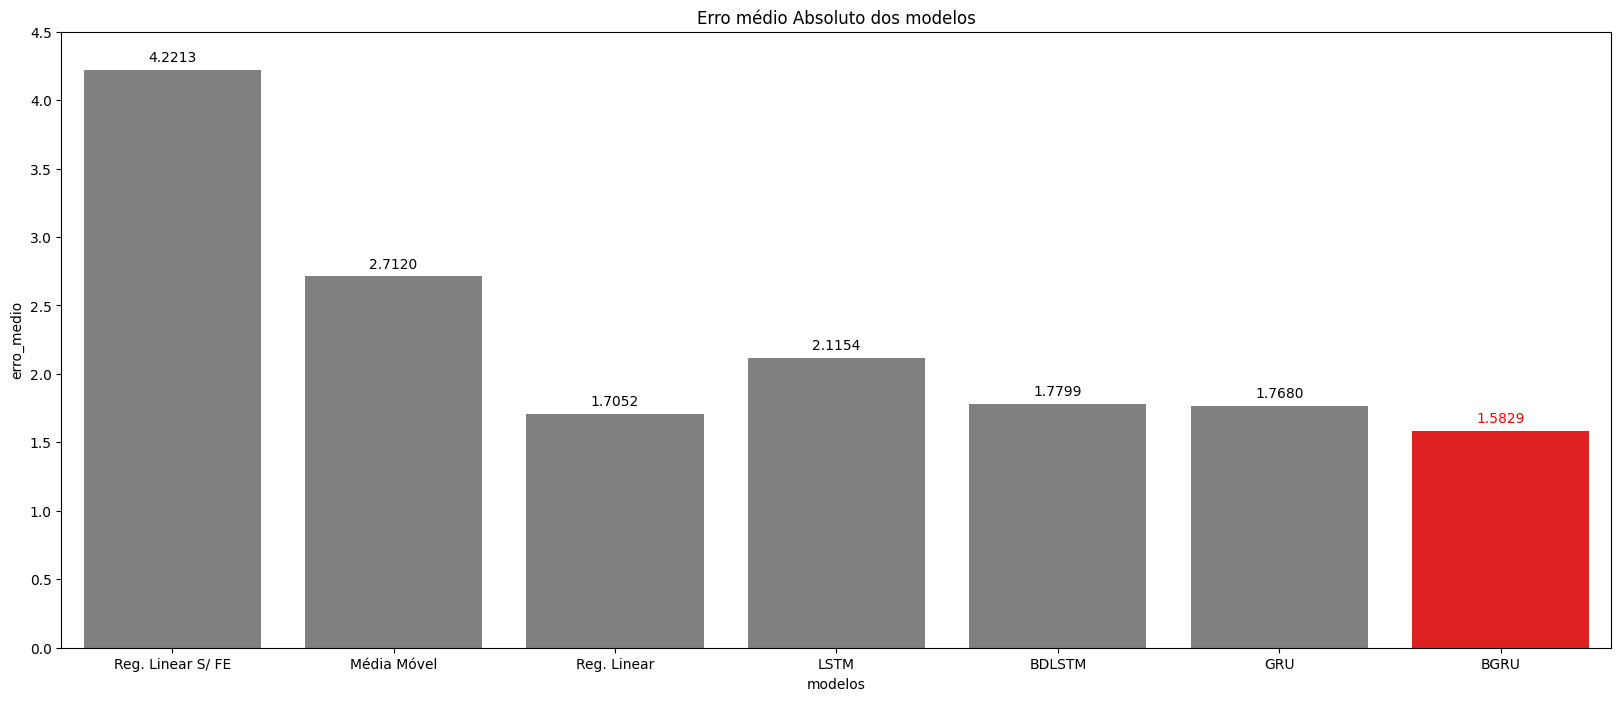

In [121]:
# Encontre o índice do maior resultado
indice_maior_resultado = resultados['erro_medio'].idxmin()
cores = ['gray' if i != indice_maior_resultado else 'red' for i in range(len(resultados))]

plt.figure(figsize=(20, 8))
ax = sns.barplot(data=resultados, x="modelos", y="erro_medio", palette=cores)
ax.set(title="Erro médio Absoluto dos modelos")
ax.set(ylim=(0,4.5))
for i, g in enumerate(ax.patches):
    ax.annotate(format(g.get_height(), '.4f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                color='red' if i == indice_maior_resultado else 'black')

plt.show()